In [77]:
import os
import re
from glob import glob
import nibabel as nib
from skimage.io import imsave
from skimage import img_as_uint, img_as_ubyte
from skimage.exposure import is_low_contrast
import shutil
import numpy as np
import matplotlib.pyplot as plt
from imageio import imwrite

In [43]:
ROOT = os.getcwd()

# inspect segmentation data

In [114]:
PATH = os.path.join(ROOT, 'TrainingBatch1', 'segmentation*')
TRAINPATH = os.path.join(ROOT, 'train', 'segmentation', '{}_{:04d}.png')
shutil.rmtree(os.path.dirname(TRAINPATH), ignore_errors=True)
os.makedirs(os.path.dirname(TRAINPATH))
index_pattern = re.compile('([\d]+).nii$')
spec = None
for path in glob(PATH):
    nii_index = index_pattern.findall(path)[0]
    nii_index = nii_index.zfill(4)
    print(nii_index)
    imgs = nib.load(path).get_data()
    for img_index in range(imgs.shape[-1]):
        img = imgs[:,:,img_index].astype(np.uint8)
        imwrite(TRAINPATH.format(nii_index, img_index), img)
        uniq, count = np.unique(img, return_counts=True)
        if uniq.shape[-1]>2 and count[2] > 5000:
            print(TRAINPATH.format(nii_index, img_index))
            spec = img
            break
    if spec is not None:
        break

0012
0011
0016
/home/zack/projects/liver_tumor/train/segmentation/0016_0401.png


In [115]:
a, b = np.unique(spec, return_counts=True)
imwrite('test.png', spec)
img.dtype, a, b

(dtype('uint8'),
 array([0, 1, 2], dtype=uint8),
 array([226960,  29872,   5312]))

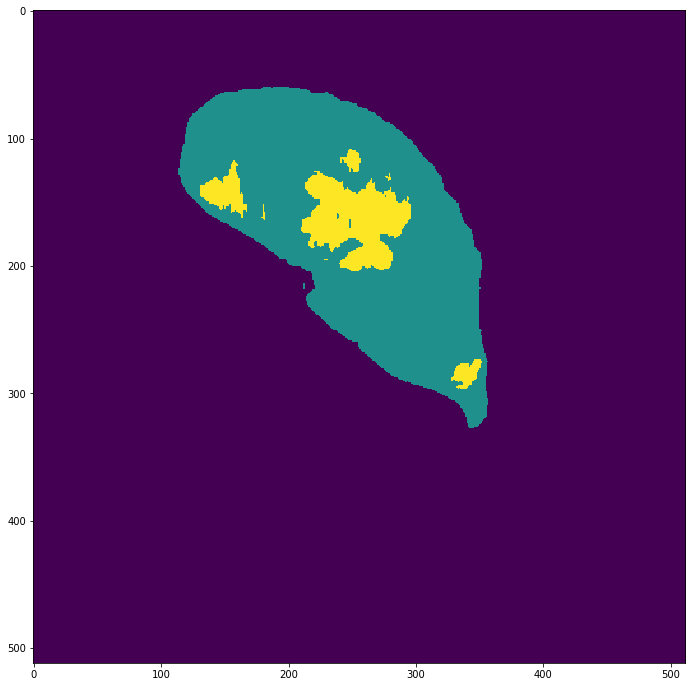

In [116]:
plt.figure(figsize=(12,12))
plt.imshow(spec)

In [117]:
IMG2 = os.path.join(ROOT, 'TrainingBatch1', 'volume-16.nii')
img = nib.load(IMG2).get_data()
img.shape

(512, 512, 689)

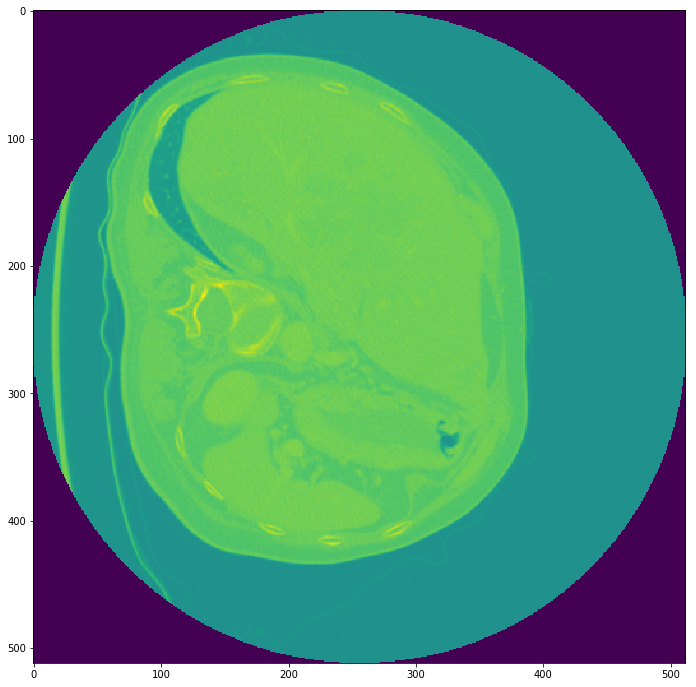

In [118]:
plt.figure(figsize=(12,12))
plt.imshow(img[:,:,401])

* (guess) in segmentation file, there are three kinds of value
  * 0: not liver
  * 1: liver
  * 2: liver tumor


# transform dataset

In [123]:
def transform_nifti(from_tag, to_tag):
    sources = [os.path.join(ROOT, from_tag, 'segmentation*'),
               os.path.join(ROOT, from_tag, 'volume*')]
    destinations = [os.path.join(ROOT, to_tag, 'segmentation', '{}_{:04d}.png'),
                    os.path.join(ROOT, to_tag, 'volume', '{}_{:04d}.png')]
    for src, dst in zip(sources, destinations):
        shutil.rmtree(os.path.dirname(dst), ignore_errors=True)
        os.makedirs(os.path.dirname(dst))
        index_pattern = re.compile('([\d]+).nii$')
        paths = glob(src)
        for i, path in enumerate(paths):
            nii_index = index_pattern.findall(path)[0]
            nii_index = nii_index.zfill(4)
            print("{} {}/{}".format(src, i+1, len(paths)), end='\r')
            imgs = nib.load(path).get_data()
            for img_index in range(imgs.shape[-1]):
                img = imgs[:,:,img_index].astype(np.uint8)
                imwrite(dst.format(nii_index, img_index), img)
        print()
transform_nifti('TrainingBatch1', 'test')
transform_nifti('TrainingBatch2', 'train')

/home/zack/projects/liver_tumor/TrainingBatch1/segmentation* 28/28
/home/zack/projects/liver_tumor/TrainingBatch1/volume* 28/28
/home/zack/projects/liver_tumor/TrainingBatch2/segmentation* 103/103
/home/zack/projects/liver_tumor/TrainingBatch2/volume* 103/103
